NAMA : AAN SUMANTO (SOEMANTO)

ASAL : PALEMBANG

EMAIL : aansoemanto0210@gmail.com

In [1]:
#Dropout rockpaperscissors Dataset: Visible Layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
#unduh dataset yang di butuhkan
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-17 00:29:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.5MB/s    in 34s     

2020-10-17 00:29:55 (8.93 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
pip install split_folders

In [4]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
#menyiapkan dataset untuk di latih.ukuran validasi set 40% dari total dataset.
import splitfolders
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
splitfolders.ratio(base_dir, output = '/tmp/rockpaperscissors/rps-cv-images/', seed = 1337, ratio = (.6, .4))

train_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images', 'train')
validation_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images', 'val')

paper_dir = os.path.join(base_dir, 'paper')
rock_dir = os.path.join(base_dir, 'rock')
scissors = os.path.join(base_dir, 'scissors')

Copying files: 2188 files [00:00, 2768.62 files/s]


In [6]:
#Membuat ObjectDataGenerator
train_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      shear_range = 0.2,
                      fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                      rescale=1./255,
                      rotation_range=20,
                      horizontal_flip=True,
                      shear_range = 0.2,
                      fill_mode = 'nearest')

In [7]:
#menggunakan object yang sudah di buat untuk persiapan data latih
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode='categorical') #klasifikasi 3 kelas jadi menggunakan class_mode='categorical'

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode='categorical') #klasifikasi 3 kelas jadi menggunakan class_mode='categorical'

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [8]:
#membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),                               
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2, input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(512, activation='relu', kernel_constraint=maxnorm(3)),
    tf.keras.layers.Dense(60, activation='relu', kernel_constraint=maxnorm(3)),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy',
  optimizer=tf.optimizers.Adam(),   
  metrics=['accuracy'])

In [10]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 31s - loss: 1.1144 - accuracy: 0.3382 - val_loss: 1.0849 - val_accuracy: 0.3840
Epoch 2/20
25/25 - 32s - loss: 0.9937 - accuracy: 0.5040 - val_loss: 0.8110 - val_accuracy: 0.7280
Epoch 3/20
25/25 - 32s - loss: 0.6086 - accuracy: 0.7808 - val_loss: 0.4690 - val_accuracy: 0.8400
Epoch 4/20
25/25 - 32s - loss: 0.3816 - accuracy: 0.8656 - val_loss: 0.4067 - val_accuracy: 0.8640
Epoch 5/20
25/25 - 31s - loss: 0.3462 - accuracy: 0.8693 - val_loss: 0.3151 - val_accuracy: 0.9120
Epoch 6/20
25/25 - 31s - loss: 0.2748 - accuracy: 0.9150 - val_loss: 0.1555 - val_accuracy: 0.9440
Epoch 7/20
25/25 - 36s - loss: 0.2275 - accuracy: 0.9120 - val_loss: 0.4071 - val_accuracy: 0.8480
Epoch 8/20
25/25 - 32s - loss: 0.1972 - accuracy: 0.9248 - val_loss: 0.3563 - val_accuracy: 0.9120
Epoch 9/20
25/25 - 32s - loss: 0.1632 - accuracy: 0.9456 - val_loss: 0.1293 - val_accuracy: 0.9360
Epoch 10/20
25/25 - 32s - loss: 0.1384 - accuracy: 0.9504 - val_loss: 0.1079 - val_accuracy: 0.9760
Epoch 11/

Saving 0a3UtNzl5Ll3sq8K[1].png to 0a3UtNzl5Ll3sq8K[1].png
0a3UtNzl5Ll3sq8K[1].png
paper


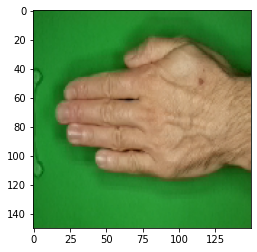

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=25)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('note sure')